# PyTorch Workflow

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.0+cu118'

## Data (preparing and loading)
creating data using linear regression formula

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
Y = weight * X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(Y)

(50, 50)

### Splitting data into training, validation and test sets

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [6]:
# visualizing data
def plot_predictions(train_data = X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
    """
    Plots training data< test data and compares predictions
    """
    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})

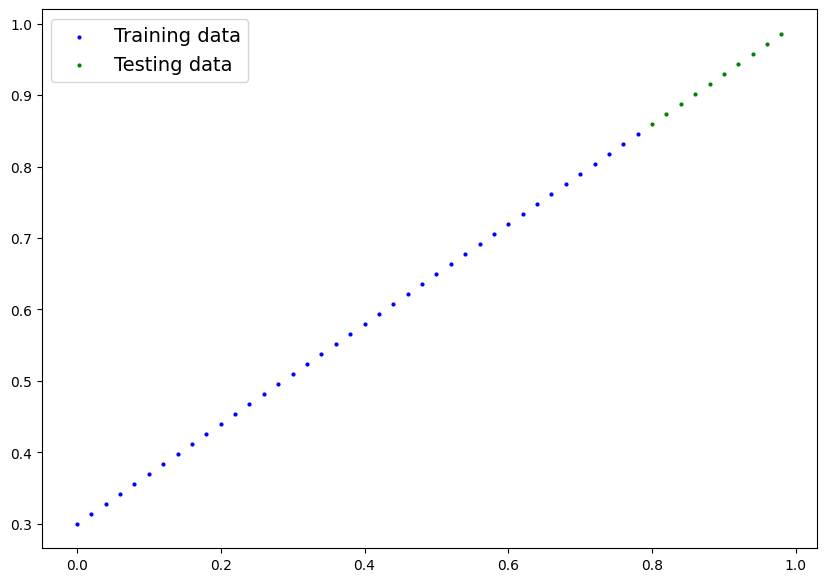

In [7]:
plot_predictions()

## Build model

In [123]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        #self.weights = nn.Parameter(torch.randn(1,
        #                                        requires_grad=True,
        #                                        dtype=torch.float))
        #self.bias = nn.Parameter(torch.randn(1,
        #                                        requires_grad=True,
        #                                        dtype=torch.float))
        # Use nn.Linear() for crating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    
    # Forward method to define the computation in the model
    #def forward(self, x: torch.Tensor) -> torch.Tensor:
    #    return self.weights * x + self.bias # linear regression formula
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

### PyTorch model building essentials

* torch.nn
* torch.nn.Parameter
* torch.nn.Module
* torch.optim
* def forward() - all nn.Module subclasses require it

In [124]:
# Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [125]:
# List named parameters
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Making prediction using `torch.inference_mode()`

In [126]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

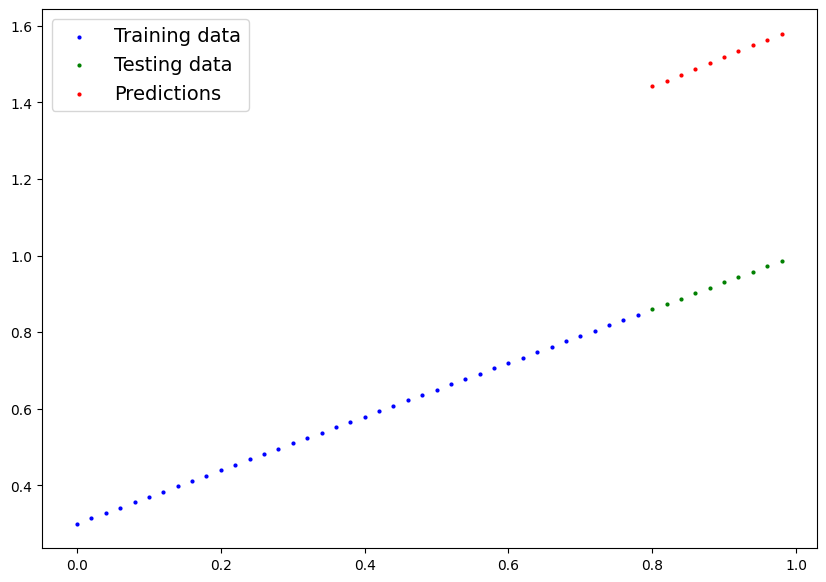

In [127]:
plot_predictions(predictions=y_preds)

## Train model

Things we need to train:
* Loss function
* Optimizer

In [128]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop in PyTorch

steps:
0. Loop through the data
1. Forward pass (data moving through forward functions) - forward propagation
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradience of each of the parameters of model with respect to the loss (backpropagation)
5. Optimizer step - use optimizer to adjust the model and improve the loss (gradient descent)

In [129]:
torch.manual_seed(42)
# loops through the data
epochs = 200

# tracl different values
epoch_count = []
loss_values = []
test_loss_values = []


### Training
# loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # sets all parameters that require gradiance to require gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, Y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Backpropagation
    loss.backward()
    
    # 5. Step the optimizer (gradient descent)
    optimizer.step()
    
    ### Testing
    model_0.eval() # turns off gradient tracking
    with torch.inference_mode():
        #1. forward pass
        test_pred = model_0(X_test)
        
        #2. calculate the loss
        test_loss = loss_fn(test_pred, Y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

epoch: 0 | loss: 0.5551779866218567 | test loss: 0.5739762187004089
epoch: 10 | loss: 0.4399680495262146 | test loss: 0.4392663538455963
epoch: 20 | loss: 0.3247582018375397 | test loss: 0.30455657839775085
epoch: 30 | loss: 0.20954827964305878 | test loss: 0.16984674334526062
epoch: 40 | loss: 0.09433844685554504 | test loss: 0.03513689711689949
epoch: 50 | loss: 0.023886386305093765 | test loss: 0.04784906655550003
epoch: 60 | loss: 0.0199567973613739 | test loss: 0.04580312222242355
epoch: 70 | loss: 0.016517987474799156 | test loss: 0.0375305712223053
epoch: 80 | loss: 0.013089170679450035 | test loss: 0.029944902285933495
epoch: 90 | loss: 0.009653178043663502 | test loss: 0.02167237363755703
epoch: 100 | loss: 0.006215679459273815 | test loss: 0.014086711220443249
epoch: 110 | loss: 0.002787243574857712 | test loss: 0.005814164876937866
epoch: 120 | loss: 0.0012645035749301314 | test loss: 0.013801807537674904
epoch: 130 | loss: 0.0012645035749301314 | test loss: 0.01380180753767

In [130]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [131]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

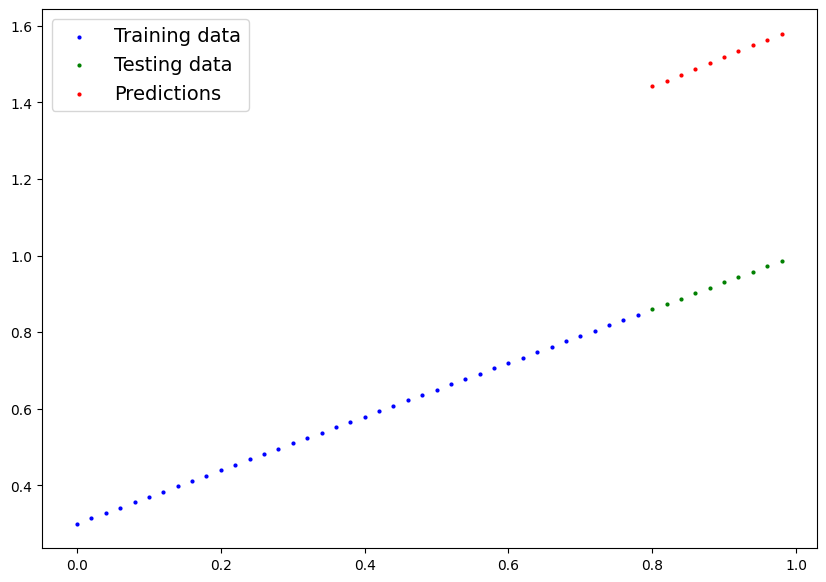

In [132]:
plot_predictions(predictions=y_preds)

In [133]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

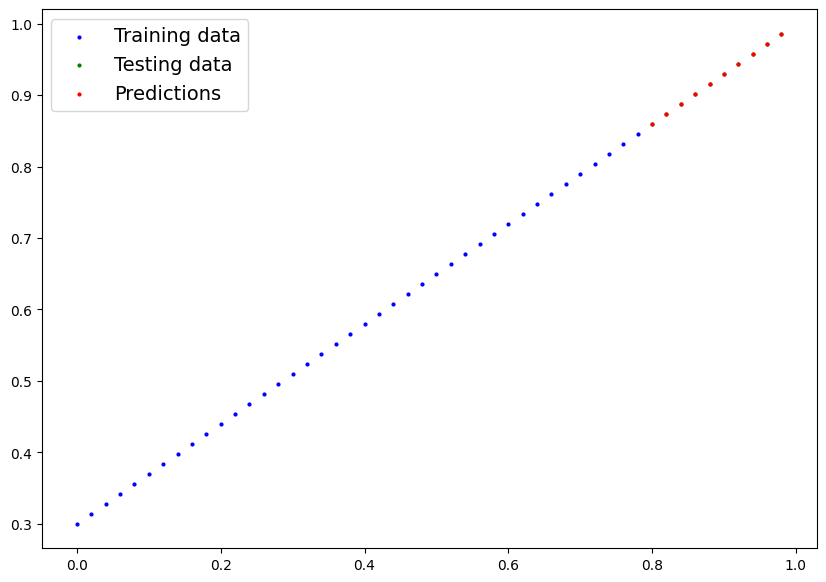

In [134]:
plot_predictions(predictions=y_preds_new)

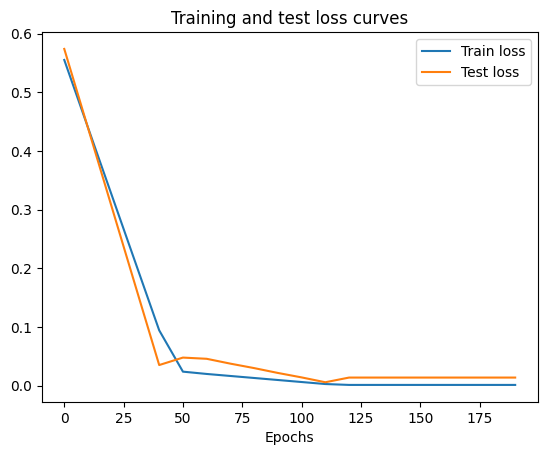

In [135]:
# Plot the loss curves
import numpy as np


plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch

There are three main methods:
1. torch.save() - save in python pickle format
2. torch,load() - load a saved object
3. torch.nn.Module.load_state_dict() - load model's saved state dictionary

In [136]:
# saving model
from pathlib import Path

# 1. Creqte models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pythorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the models state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pythorch_workflow_model_0.pth


## Loading a PyTorch model

In [137]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [138]:
loaded_model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [139]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

In [140]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

In [141]:
model_0(torch.tensor([0.5, 0.4]).unsqueeze(dim=1))

tensor([[0.6509],
        [0.5812]], grad_fn=<AddmmBackward0>)